In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer


In [3]:
data=load_breast_cancer()
breast_cancer=pd.DataFrame(data.data, columns=data.feature_names)
breast_cancer=breast_cancer.loc[:, ['mean radius', 'mean compactness']]
display(breast_cancer)

,mean radius,mean compactness
0,17.99,0.27760
1,20.57,0.07864
2,19.69,0.15990
3,11.42,0.28390
4,20.29,0.13280
...,...,...
564,21.56,0.11590
565,20.13,0.10340
566,16.60,0.10230
567,20.60,0.27700


In [4]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

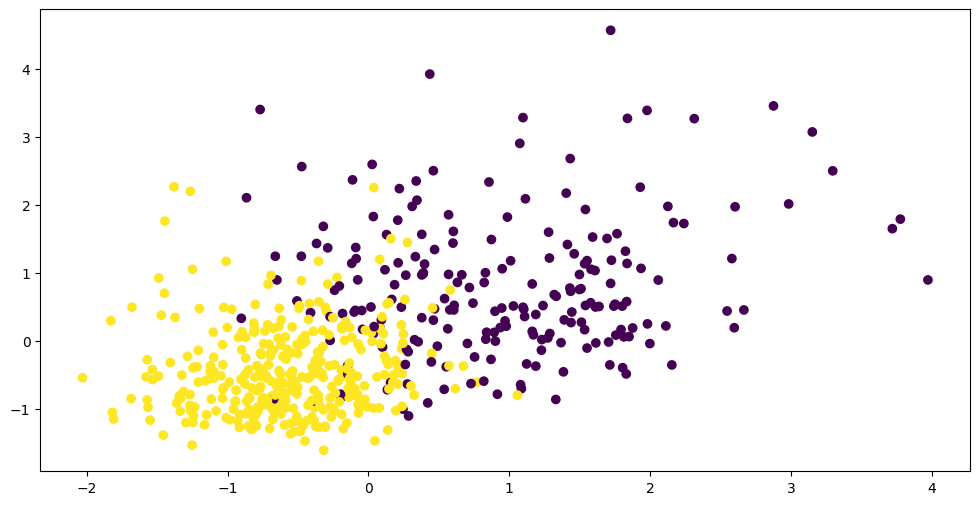

In [5]:
plt.figure(figsize=(12,6))
x=StandardScaler().fit_transform(breast_cancer)
plt.scatter(x[:,0], x[:,1], c=data.target)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
models=[]
boost_times=[50, 100, 500, 1000]
for times in boost_times:
  model=AdaBoostClassifier(n_estimators=times, random_state=1).fit(x, data.target)
  models.append(model)

In [7]:
import numpy as np


In [9]:
x_min, x_max=x[:,0].min()-1, x[:,0].max()+1
y_min, y_max=x[:,1].min()-1, x[:,1].max()+1
xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

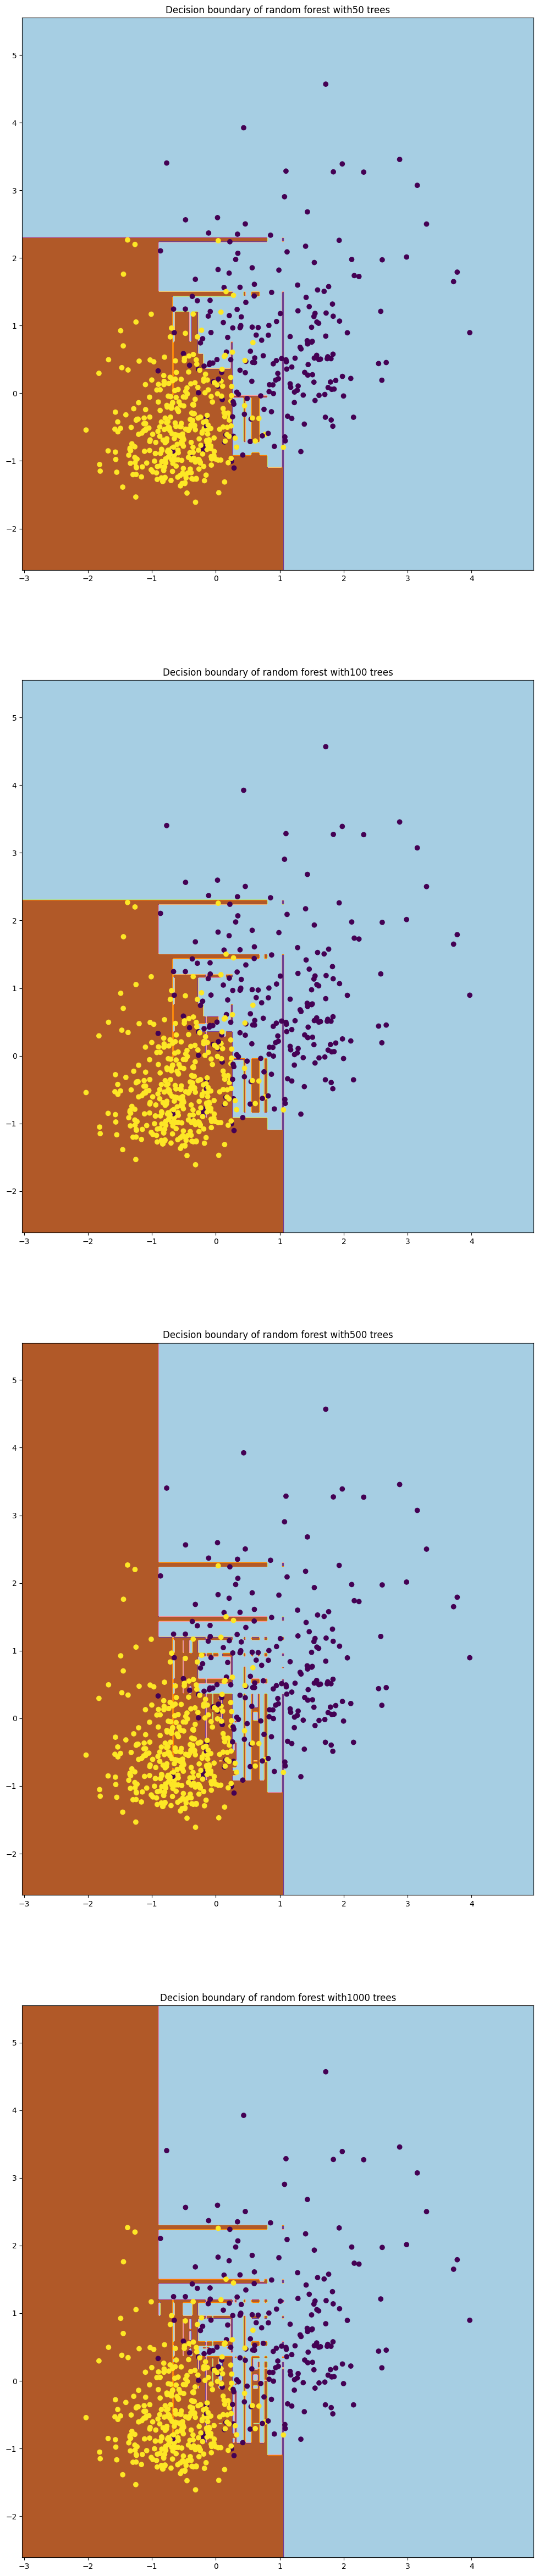

In [11]:
plt.figure(figsize=(12,60))
for index, model in enumerate(models):
  plt.subplot(len(models),1, index+1)
  z=model.predict(np.c_[xx.ravel(), yy.ravel()])
  z=z.reshape(xx.shape)
  plt.title(f"Decision boundary of random forest with{boost_times[index]} trees")
  cs=plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
  plt.scatter(x[:,0], x[:,1], c=data.target)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
models=[]
boost_times=[100, 200, 500, 3000]
for times in boost_times:
  model=GradientBoostingClassifier(n_estimators=times, random_state=1).fit(x, data.target)
  models.append(model)

In [16]:
x_min, x_max=x[:,0].min()-1, x[:,0].max()+1
y_min, y_max=x[:,1].min()-1, x[:,1].max()+1
xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

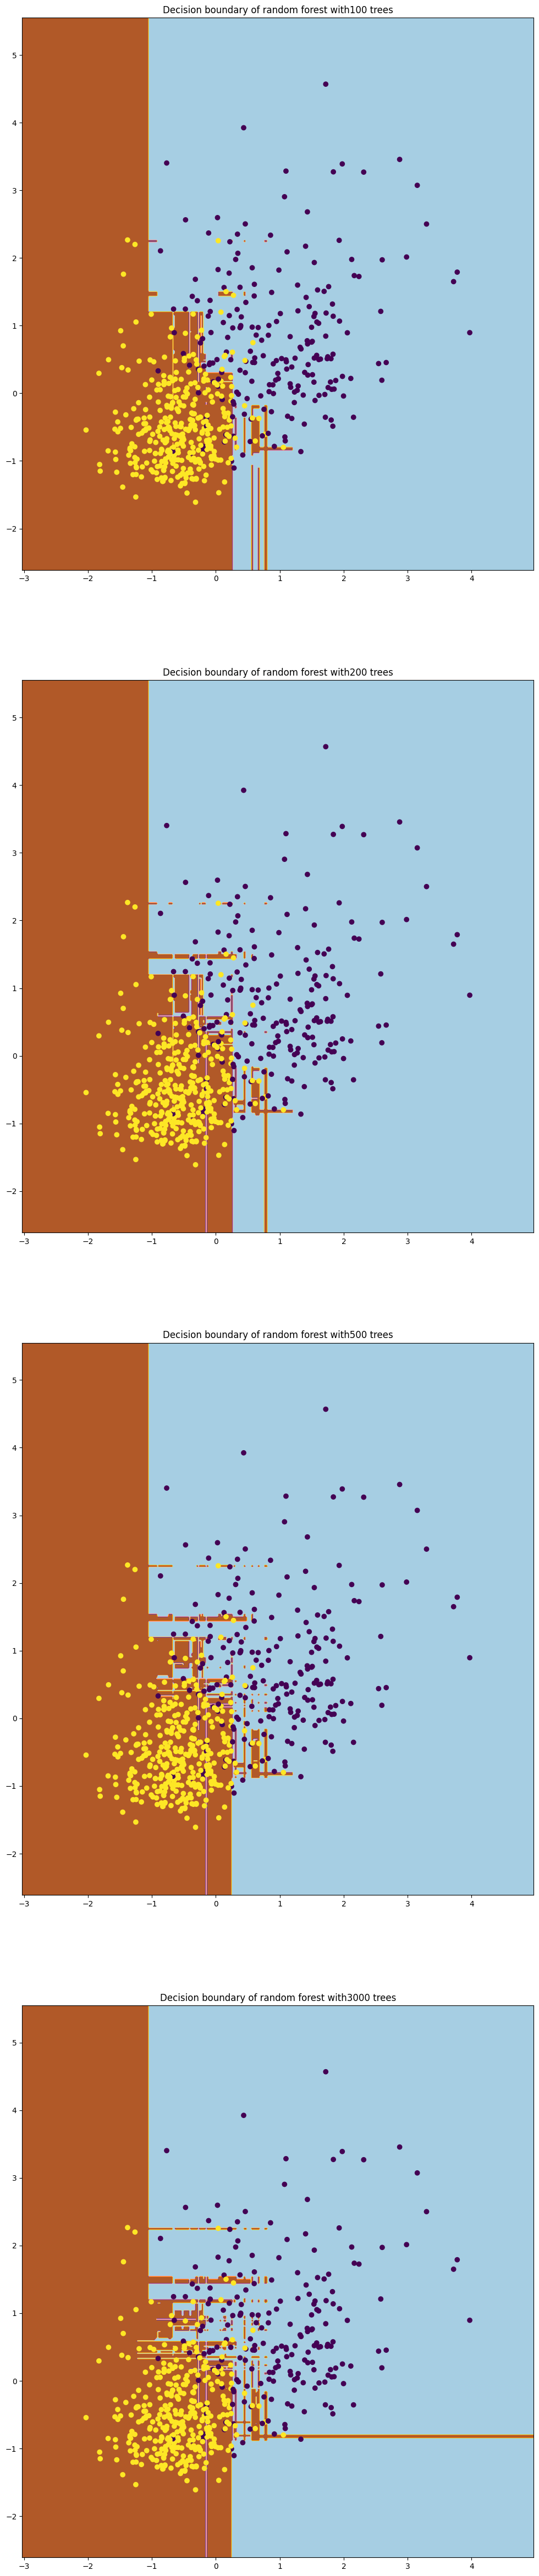

In [17]:
plt.figure(figsize=(12,60))
for index, model in enumerate(models):
  plt.subplot(len(models),1, index+1)
  z=model.predict(np.c_[xx.ravel(), yy.ravel()])
  z=z.reshape(xx.shape)
  plt.title(f"Decision boundary of random forest with{boost_times[index]} trees")
  cs=plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
  plt.scatter(x[:,0], x[:,1], c=data.target)